In [107]:
import json
from os.path import join

import numpy as np
import pandas as pd
from dn_utils.path import path
from pathlib import Path
import matplotlib.pyplot as plt
from bct.algorithms.clustering import agreement, consensus_und


%matplotlib inline


In [4]:
atlas = "combined_roi_4and5"
gamma_range = np.arange(0.5, 2, 0.5)

# Create output paths
path_corrmats = join(path["bsc"], "corrmats")
path_corrmats_unthr = join(path_corrmats, atlas, f"unthr")
Path(path_corrmats_unthr).mkdir(exist_ok=True, parents=True)

In [5]:
# Load correlation matrices and metadata
corrmats_aggregated = np.load(
    join(path_corrmats, atlas, "corrmats_aggregated.npy"))
with open(join(path_corrmats, atlas, "corrmats_aggregated.json"), "r") as f:
    meta = json.loads(f.read())

# Load modularity information
m = {}
for gamma in gamma_range:
    gamma_str = str(float(gamma)).replace(".", "_")
    path_corrmats_unthr_gamma = join(path_corrmats_unthr, f"gamma_{gamma_str}")
    m[gamma] = np.load(join(path_corrmats_unthr_gamma, "m_aggregated.npy"))
    
# Load subject exclusion
df_exclusion = pd.read_csv(
    join(path["nistats"], "exclusion/exclusion.csv"), index_col=0)
ok_index = df_exclusion["ok_all"]    
    
# Load ROI information
df_roi = pd.read_csv(join(path_corrmats, atlas, "roi_table_filtered.csv"))
    
n_subjects = len(meta["dim1"])
n_conditions = len(meta["dim2"])
n_perr_sign = len(meta["dim3"])
n_roi = len(df_roi)

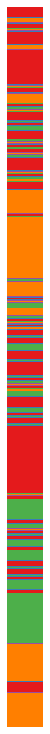

In [106]:
fig, ax = plt.subplots(figsize=(0.5, 10))

plt.imshow(m[1][15, 1, 0][:, np.newaxis], aspect="auto", cmap="Set1", clim=[1, 5])
plt.axis('off')
plt.tight_layout(pad=0)
plt.autoscale(tight=True)
plt.savefig('fig.png')
plt.show()

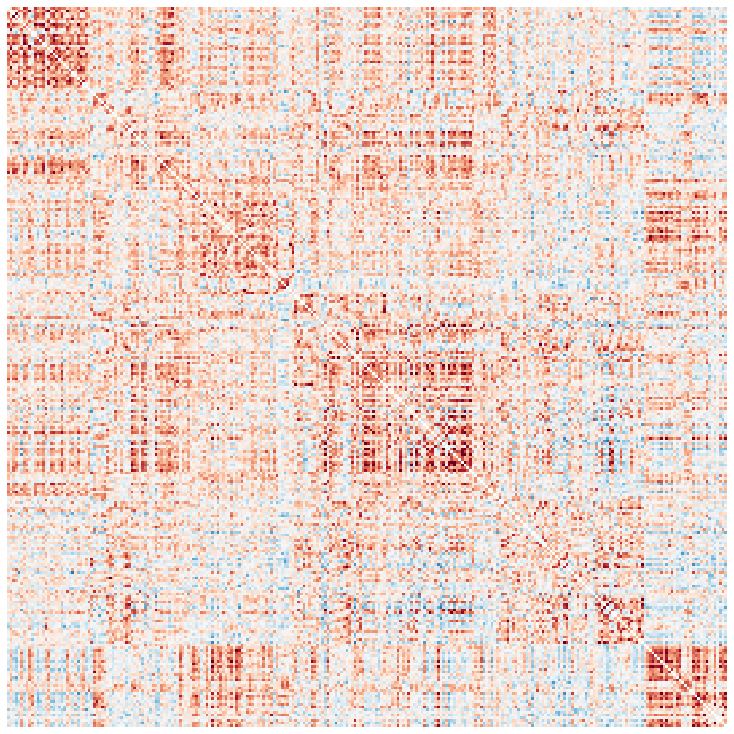

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(corrmats_aggregated[4, 1, 1], interpolation="none", clim=[-1, 1], cmap="RdBu_r")
plt.axis("off")
plt.tight_layout(pad=0)

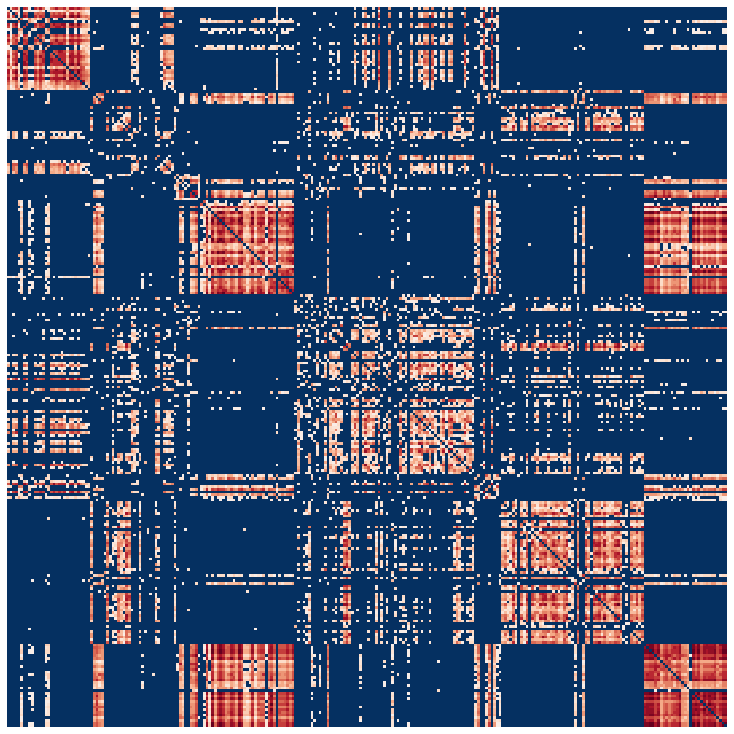

In [132]:
fig, ax = plt.subplots(figsize=(10, 10))
mat = agreement(m[1][:, 0, 0].T) / 32
ax.imshow(mat * (mat > 0.5), interpolation="none", clim=[0, 1], cmap="RdBu_r")
plt.axis("off")
plt.tight_layout(pad=0)



In [138]:
from nilearn.plotting import plot_connectome

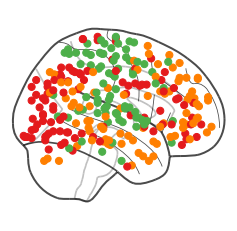

In [191]:
mt = m[1][21, 0, 0]

node_colors = list(pd.Series(mt).map({
    1: "#e41a1c",
    2: "#4daf4a",
    3: "#ff7f00",
}))

fig, ax = plt.subplots(figsize=(4, 4), facecolor=None)
plot_connectome(
    np.zeros((268, 268)),
    node_coords=df_roi[["x", "y", "z"]].values,    
    node_color=node_colors,
    display_mode="x",
    axes=ax
)

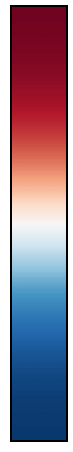

In [241]:
a = np.array([[0,1]]).T
fig, ax = plt.subplots(figsize=(1, 8))
img = ax.imshow(a, cmap="RdBu_r", clim=[0, 1], interpolation="gaussian", aspect="auto", origin="lower")
plt.xticks([])
# plt.yticks([-.5, 1.5], [-1, 1], fontsize=45)
plt.yticks([])
for s in ax.spines.values():
    s.set_linewidth(2)

In [243]:
ok_index.sum()

29